# Libraries

In [20]:
!pip install cmake==3.18.2
!pip install multicoretsne
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# analysis & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")
sns.set_palette("magma")

# methods for comparison
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from umap import UMAP

# datasets for comparison
from sklearn.datasets import fetch_openml, load_digits
import gensim

# Data loading

In [22]:
fmnist, fmnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)
digits, digits_labels = load_digits(return_X_y=True, as_frame=False)
shuttle, shuttle_labels = fetch_openml(data_id=40685, return_X_y=True, as_frame=False)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [23]:
print('shape of fashion mnist dataset is ', fmnist.shape)
print('shape of mnist dataset is ', mnist.shape)
print('shape of pendigits dataset is ', digits.shape)
print('shape of shuttle dataset is ', shuttle.shape)

shape of fashion mnist dataset is  (70000, 784)
shape of mnist dataset is  (70000, 784)
shape of pendigits dataset is  (1797, 64)
shape of shuttle dataset is  (58000, 9)


# Apply different techniques of dimension reduction

### single comparison if PCA & SVD & TSNE & UMAP using 'mnist' dataset

In [24]:
%%time
pca_mnist = PCA(n_components=2).fit_transform(mnist)

CPU times: user 5.96 s, sys: 386 ms, total: 6.34 s
Wall time: 3.43 s


In [25]:
%%time
svd_mnist = TruncatedSVD(n_components=2).fit_transform(mnist)

CPU times: user 4.73 s, sys: 231 ms, total: 4.96 s
Wall time: 2.61 s


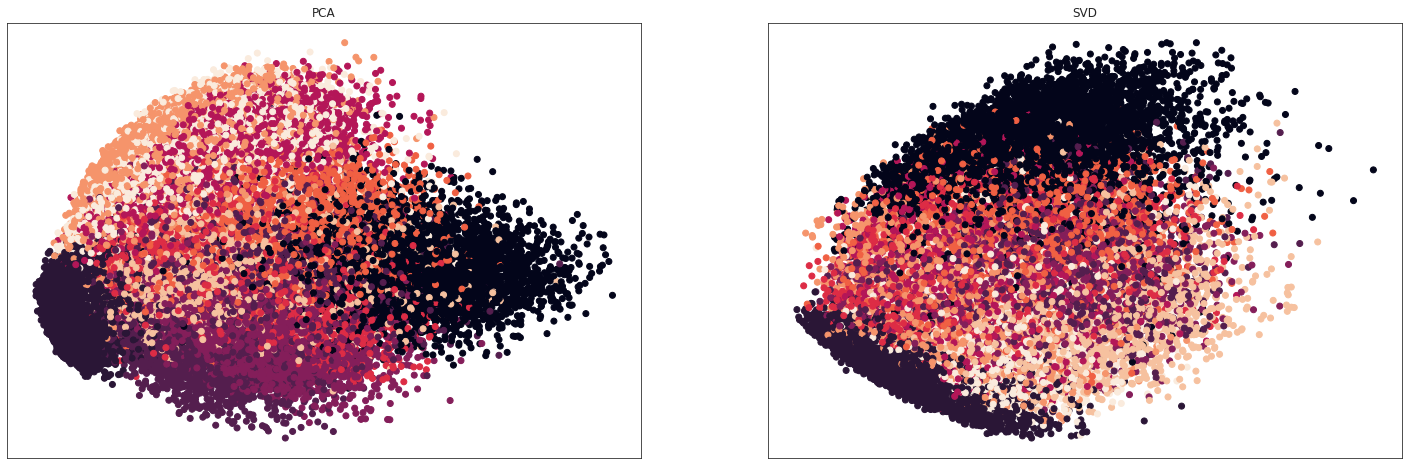

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
names_of_labels_mnist = np.unique(mnist_labels.astype(int)).tolist()
g1 = ax1.scatter(pca_mnist[:, 0], pca_mnist[:, 1], c=mnist_labels.astype(int))
g2 = ax2.scatter(svd_mnist[:, 0], svd_mnist[:, 1], c=mnist_labels.astype(int))
ax1.set_title('PCA')
ax2.set_title('SVD')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

In [27]:
%%time
umap_mnist = UMAP(n_components=2).fit_transform(mnist)

CPU times: user 2min 23s, sys: 2.19 s, total: 2min 25s
Wall time: 1min 26s


In [28]:
%%time
tsne_mnist = TSNE(n_components=2).fit_transform(mnist)

CPU times: user 27min 51s, sys: 2.09 s, total: 27min 53s
Wall time: 27min 47s


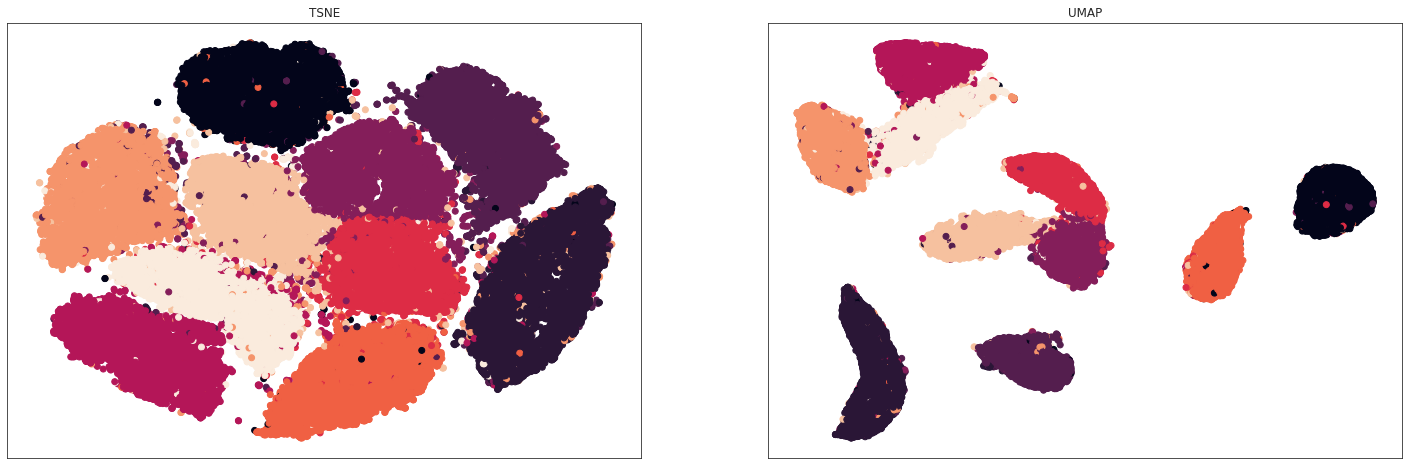

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
names_of_labels_mnist = np.unique(mnist_labels.astype(int)).tolist()
g1 = ax1.scatter(tsne_mnist[:, 0], tsne_mnist[:, 1], c=mnist_labels.astype(int))
g2 = ax2.scatter(umap_mnist[:, 0], umap_mnist[:, 1], c=mnist_labels.astype(int))
ax1.set_title('TSNE')
ax2.set_title('UMAP')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

#### range of hyperparameters for UMAP: penDigits dataset

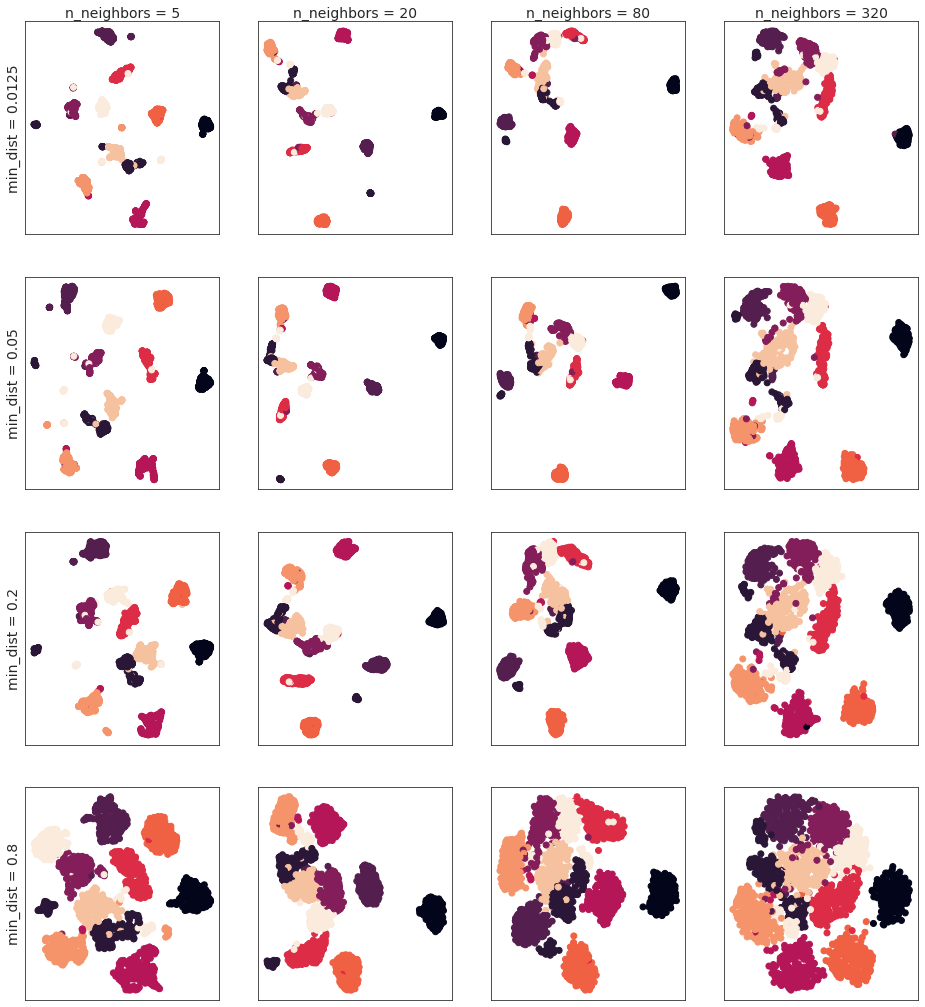

In [30]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))
for i, dist in enumerate([0.0125, 0.05, 0.2, 0.8]):
    for j, neighbors in enumerate([5, 20, 80, 320]): 
      if i == 0:
         axs[i, j].set_xlabel(f'n_neighbors = {neighbors}', fontsize=14) 
         axs[i, j].xaxis.set_label_position('top') 
      if j == 0:
        axs[i, j].set_ylabel(f'min_dist = {dist}', fontsize=14)  
      umap_embeddings = UMAP(n_components=2,
                             n_neighbors=neighbors,
                             min_dist=dist).fit_transform(digits)
      axs[i, j].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=digits_labels.astype(int))
      axs[i, j].set_xticks([])
      axs[i, j].set_yticks([])

#### range of hyperparameters for UMAP: mnist dataset

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 18))
for i, dist in enumerate([0.0125, 0.05, 0.2, 0.8]):
    for j, neighbors in enumerate([5, 20, 80, 320]): 
      if i == 0:
         axs[i, j].set_xlabel(f'n_neighbors = {neighbors}', fontsize=14) 
         axs[i, j].xaxis.set_label_position('top') 
      if j == 0:
        axs[i, j].set_ylabel(f'min_dist = {dist}', fontsize=14)  
      umap_embeddings = UMAP(n_components=2,
                             n_neighbors=neighbors,
                             min_dist=dist).fit_transform(mnist)
      axs[i, j].scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=mnist_labels.astype(int))
      axs[i, j].set_xticks([])
      axs[i, j].set_yticks([])

### range of datasets and methods

In [ ]:
TSNE_model = TSNE(n_components=2)
UMAP_model = UMAP(n_components=2),
SVD_model = TruncatedSVD(n_components=2)
PCA_model = PCA(n_components=2)
methods = [('TSNE', TSNE_model), ('UMAP', UMAP_model), ('SVD', TruncatedSVD), ('PCA', PCA_model)]
datasets = [('MNIST', mnist, mnist_labels), ('PenDigits', digits, digits_labels),
            ('FSH-mnist', fmnist, fmnist_labels), ('Shuttle', shuttle, shuttle_labels)]

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(13, 16))
for i, (name, model) in enumerate(methods):
    for j, (title, data, labels) in enumerate(datasets): 
      if i == 0:
        axs[i, j].set_xlabel(f'{title}', fontsize=14) 
        axs[i, j].xaxis.set_label_position('top') 
      if j == 0:
        axs[i, j].set_ylabel(f'{name}', fontsize=14)  
      
      embeddings = model.fit_transform(data)
      
      axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=labels.astype(int))
      axs[i, j].set_xticks([])
      axs[i, j].set_yticks([])